# Parte 1: White Patch
Se expone el algoritmo para aminorar las diferencias de color debido a la iluminación, conocido como _White patch_.

In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



## Imágenes
Se levantan las imágenes que se emplearán como prueba del algoritmo. Se verifica el orden de los canales de color


In [2]:
# Definición de la ruta para levantar las imagenes
PATH = r'D:\Profesion\Disciplinas\vision_computadora_I\practicas\tp_1\data'

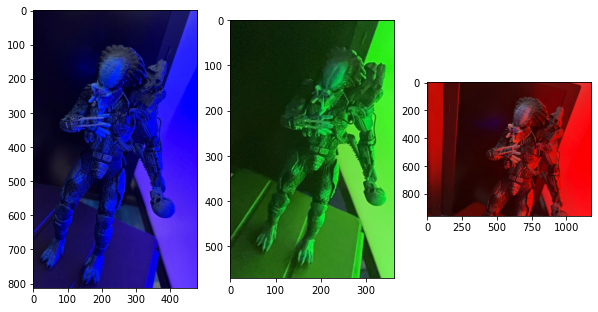

Dimensiones de la imagen red (813, 481, 3)
Dimensiones de la imagen green (571, 363, 3)
Dimensiones de la imagen blue (959, 1181, 3)


In [3]:

img_wp_r = cv.imread(os.path.join(PATH, 'wp_red.png'))
img_wp_g = cv.imread(os.path.join(PATH, 'wp_green.png'))
img_wp_b = cv.imread(os.path.join(PATH, 'wp_no_white.png'))

# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
fig = plt.figure(figsize=(10,8))

ax1=plt.subplot(131)
ax1.imshow(img_wp_r)

ax2=plt.subplot(132)
ax2.imshow(img_wp_g)

ax3=plt.subplot(133)
ax3.imshow(img_wp_b)

plt.show()
# Verificación de dimensiones y canales
print(f'Dimensiones de la imagen red {img_wp_r.shape}')
print(f'Dimensiones de la imagen green {img_wp_g.shape}')
print(f'Dimensiones de la imagen blue {img_wp_b.shape}')

Los canales están intercambiados entre el rojo y el azul. Se hace el intercambio de orden de canales en cada tensor. 

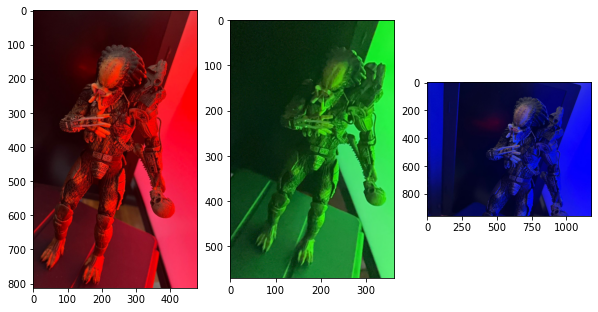

In [4]:
img_wp_r = cv.cvtColor(img_wp_r, cv.COLOR_BGR2RGB)
img_wp_g = cv.cvtColor(img_wp_g, cv.COLOR_BGR2RGB)
img_wp_b = cv.cvtColor(img_wp_b, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,8))

ax1=plt.subplot(131)
ax1.imshow(img_wp_r)

ax1=plt.subplot(132)
ax1.imshow(img_wp_g)

ax2=plt.subplot(133)
ax2.imshow(img_wp_b)

plt.show()

## _White patch_
Primero se verifica si los canales de cada imagen presentan saturación. De estos resultados dependerá el ajuste a realizar sobre el algoritmo

In [5]:
# Verificación sobre la imagen en rojo
img_wp_r_max = np.array([np.max(img_wp_r[...,0]), np.max(img_wp_r[...,1]), np.max(img_wp_r[...,2])])

print(f'Imagen roja, máximo valor del pixel canal R: {img_wp_r_max[0]}')
print(f'Imagen roja, máximo valor del pixel canal G: {img_wp_r_max[1]}')
print(f'Imagen roja, máximo valor del pixel canal B: {img_wp_r_max[2]}')

Imagen roja, máximo valor del pixel canal R: 255
Imagen roja, máximo valor del pixel canal G: 134
Imagen roja, máximo valor del pixel canal B: 122


In [6]:
# Verificación sobre la imagen en verde
img_wp_g_max = np.array([np.max(img_wp_g[...,0]), np.max(img_wp_g[...,1]), np.max(img_wp_g[...,2])])

print(f'Imagen verde, máximo valor del pixel canal R: {img_wp_g_max[0]}')
print(f'Imagen verde, máximo valor del pixel canal G: {img_wp_g_max[1]}')
print(f'Imagen verde, máximo valor del pixel canal B: {img_wp_g_max[2]}')

Imagen verde, máximo valor del pixel canal R: 126
Imagen verde, máximo valor del pixel canal G: 252
Imagen verde, máximo valor del pixel canal B: 155


In [7]:
# Verificación sobre la imagen en azul
img_wp_b_max = np.array([np.max(img_wp_b[...,0]), np.max(img_wp_b[...,1]), np.max(img_wp_b[...,2])])

print(f'Imaben azul, máximo valor del pixel canal R: {img_wp_b_max[0]}')
print(f'Imaben azul, máximo valor del pixel canal b: {img_wp_b_max[1]}')
print(f'Imaben azul, máximo valor del pixel canal B: {img_wp_b_max[2]}')

Imaben azul, máximo valor del pixel canal R: 168
Imaben azul, máximo valor del pixel canal b: 166
Imaben azul, máximo valor del pixel canal B: 255


Saturan los canales del color predominante en las imágenes roja y azul. En esos casos, en vez de tomar el valor máximo de píxel, se considerará el valor de prixel presente entre los percentiles 99,9% y 99,5%. Esto quiere decir tomar el máximo valor de pixel entre los valores 254 y 253. 

In [8]:
def white_patch(input_image):
    '''
    Función de cálculo white patch
    input_image: imagen a procesar.   
    '''

    # Se definen los valores de los píxeles como int16
    image = input_image.astype('uint16') 
    # Se calcula el array que contiene el valor de pixel máximo en cada canal
    image_max = np.array([np.max(image[...,0]), np.max(image[...,1]), np.max(image[...,2])])

    # Ajuste de los píxeles máximos por saturación
    if np.max(image_max)==255:
        idx_max = np.where(image_max==255)
        mask = image[...,idx_max]
        max_2 = np.max(mask[np.where(np.logical_and(mask>=253, mask<255))])
        image_max[idx_max] = max_2
    
    # Cálculo de white patch
    image_wp = (255/image_max)*image
    # Truncamiento al intervalo [0, 250]
    np.clip(image_wp, 0, 255, out=image_wp)
    # Devolución de la imagen con valores de pixeles como enteros de 8 bits
    return image_wp.astype('uint8')
    

## Procesamiento de las imágenes

In [9]:
# Coordenadas cromáticas de cada imagen
wp_r = white_patch(img_wp_r)
wp_g = white_patch(img_wp_g)
wp_b = white_patch(img_wp_b)

## Muestra de imágenes y conclusiones
El objeto se logra distinguir el efecto del algoritmo _white patch_ en cada imagen, atenuando el efecto de iluminación. Aunque no resulta del todo eficiente. Podría mejorarse.

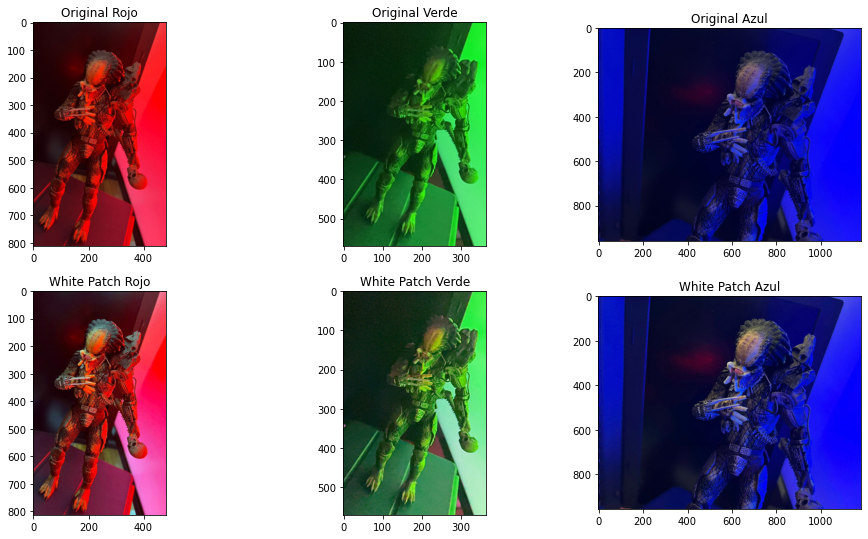

In [10]:
# Nueva figura
fig = plt.figure(figsize=(16, 14))

# Imagen original rojo
ax1=plt.subplot(331)
ax1.imshow(img_wp_r)
ax1.set_title('Original Rojo')

# Imagen original verde
ax2=plt.subplot(332)
ax2.imshow(img_wp_g)
ax2.set_title('Original Verde')

# Imagen original azul
ax2=plt.subplot(333)
ax2.imshow(img_wp_b)
ax2.set_title('Original Azul')

# Imagen white patch rojo
ax1=plt.subplot(334)
ax1.imshow(wp_r)
ax1.set_title('White Patch Rojo')

# Imagen white patch verde
ax1=plt.subplot(335)
ax1.imshow(wp_g)
ax1.set_title('White Patch Verde')

# Imagen white patch azul
ax1=plt.subplot(336)
ax1.imshow(wp_b)
ax1.set_title('White Patch Azul')

plt.show()